# Project: Predicting Heart Disease

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

This project uses data from a [Kaggle dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction "Kaggle dataset") includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

The objective of this project is to use the dataset and build a K-Nearest Neighbors classifier to accurately predict the likelihood of a new patient having heart disease in the future.

#### Import libraries

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read the data file to a pandas dataframe

In [2]:
df = pd.read_csv("heart_disease_prediction.csv")

# Exploratory Data Analysis

## Attribute Information

The data set is composed by the following features:

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


**Source**

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

    Cleveland: 303 observations
    Hungarian: 294 observations
    Switzerland: 123 observations
    Long Beach VA: 200 observations
    Stalog (Heart) Data Set: 270 observations

Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

#### Display the first five rows of the dataframe

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Print out the number of features and observations in the dataset.

In [4]:
df.shape

(918, 12)

The dataset has 918 rows and 12 features as indicated in the dataset information.

#### Identify the categorical and numerical features

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

We can observe that we have 6 numerical features (Age, ChestPainType, Cholesterol, FastingBS, MaxHR, Oldpeak) and 5 categorical features (Sex, ChestPainType, RestingEC, ExerciseAngina, ST_Slope). 

HeartDisease and FastingBS have type int64, however are also categorical variavles, since they only take values 0 and 1.

### Descriptive Statistics

#### Numerical variables

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From the description table we can observe the following:

* There are no missing values in any of the numerical column.

* The mean in target variable is over 50%, indicating that there are more heart disease patients in the variable.

* The average age is 53 years old, with the oldest patient with 77 years old.

* The cholesterol variable shows a higher median than the mean indicating a left skewed distribution and possible oultiers on the high end.

* Both variables RestingBP and Cholesterol show 0.0 minimum values, which need to be investigated.



#### Categorical Variables

Determining missing values:

In [7]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The results indicate that there are no missing values in the categorical columns as well.

In [8]:
df.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


#### Visualizing categorical variables

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']


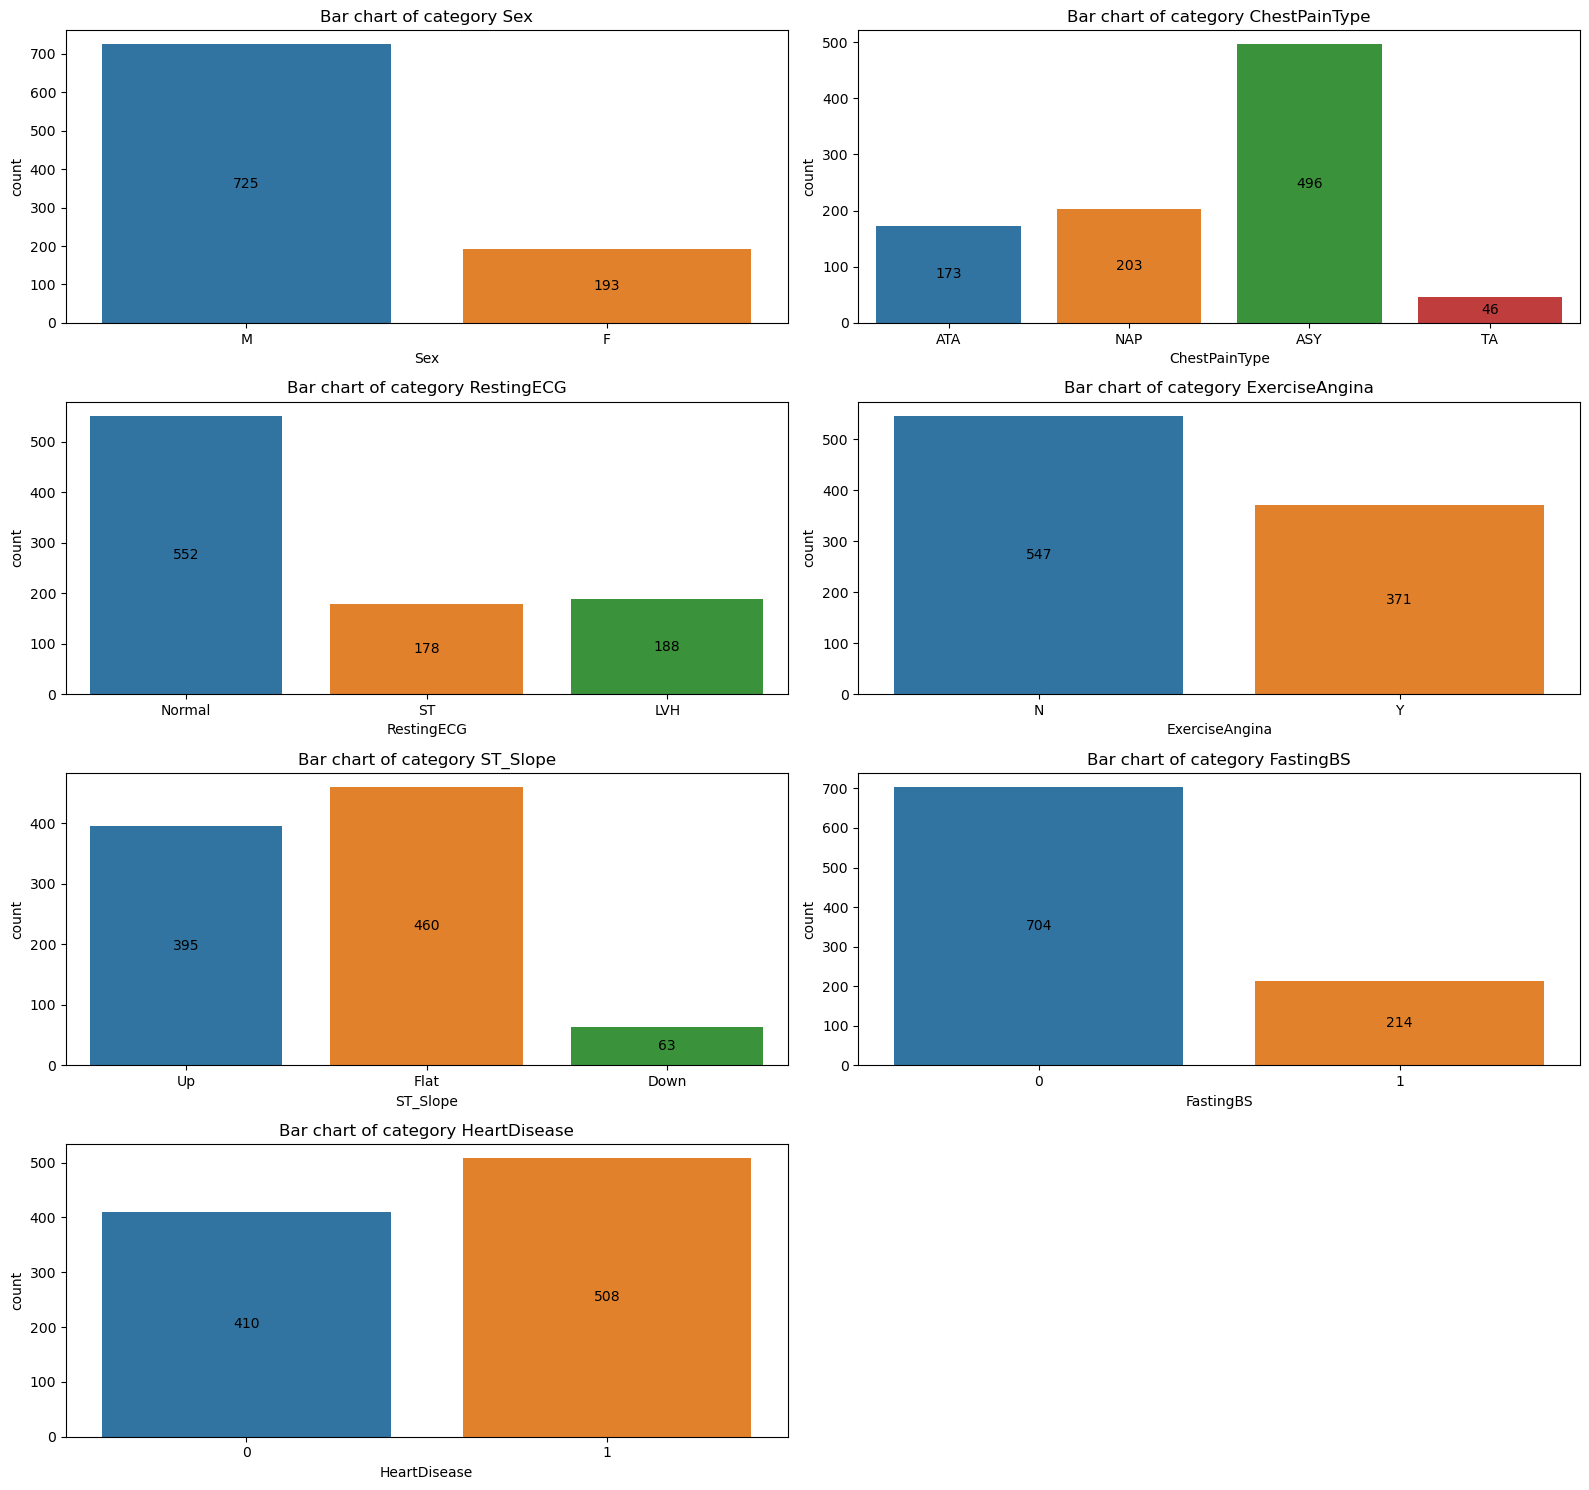

In [9]:
features = df.select_dtypes(include=['object']).columns.tolist() + ["FastingBS", "HeartDisease"]
print(features)

fig = plt.figure(figsize=(16,15))
for ax, col in enumerate(features):
    ax = plt.subplot(4, 2, ax+1)
    sns.countplot(x=df[col], ax=ax)
    # add data labels and title to each bar chart
    for container in ax.containers:
        ax.bar_label(container, label_type="center")
        ax.set_title(label="Bar chart of category " + str(col))

#plt.delaxes(ax=ax8)
plt.rc('legend', loc="upper right")
plt.tight_layout()
plt.show()

#plt.savefig('test.png', dpi = 150)

From the bar charts, we can observe the following:
* Most patients are male. 
* Most chest pain types are asymptomatic and most patients resting ECG's are normal. 
* Most patients exercise do not induce angina and the slope of the peak exercise ST segment is mostly flat followed by upsloping. 
* Most patients have a fasting blood sugar < 120 mg/dl.

Grouping the categories according to the target variable we obtain the following bar charts:

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']


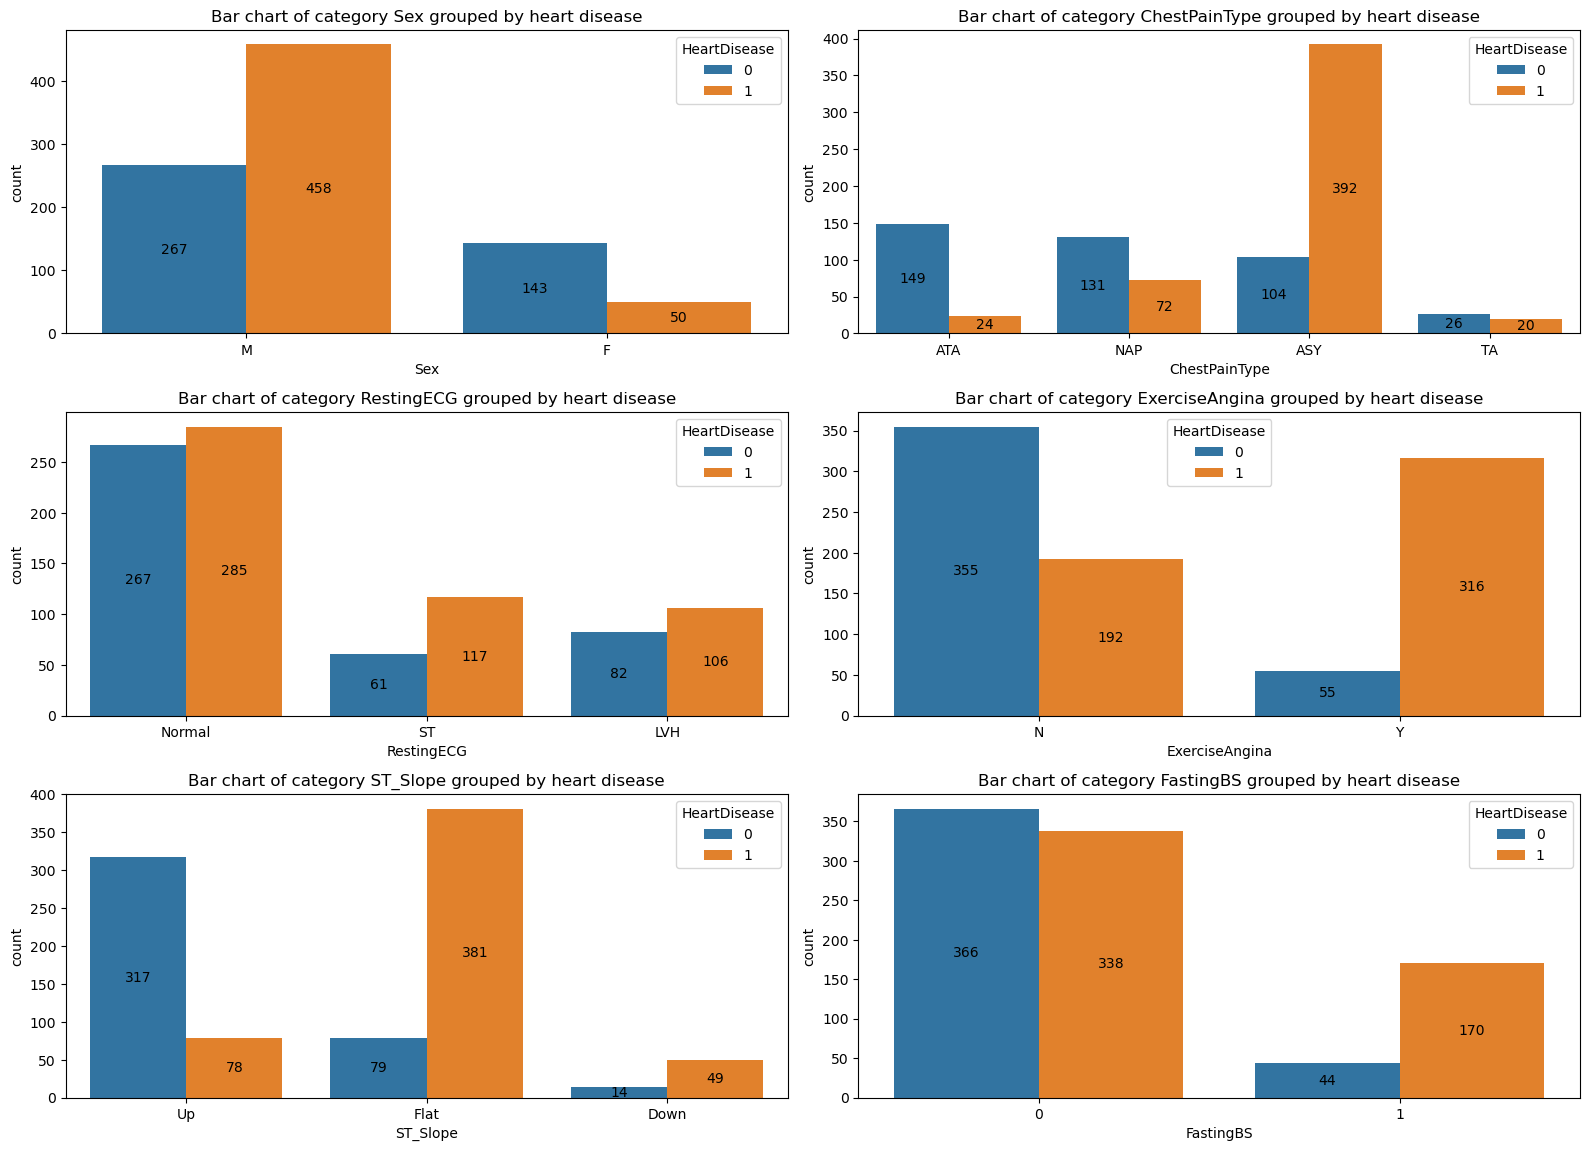

In [10]:
features = df.select_dtypes(include=['object']).columns.tolist() + ["FastingBS"]
print(features)

fig = plt.figure(figsize=(16,15))
for ax, col in enumerate(features):
    ax = plt.subplot(4, 2, ax+1)
    sns.countplot(x=df[col], hue= df["HeartDisease"], ax=ax)
    # add data labels and title to each bar chart
    for container in ax.containers:
        ax.bar_label(container, label_type="center")
        ax.set_title(label="Bar chart of category " + str(col) +" grouped by heart disease")

#plt.delaxes(ax=ax8)
plt.rc('legend', loc="upper right")
plt.tight_layout()
plt.show()

#plt.savefig('test.png', dpi = 150)

The bar charts grouped by condition of heart disease can provide the following observations:
* More male patients have heart disease comparing with the female patient where the number of patients with heart disease is lower.
* While all other categories of chest pain have a lower number of patients with heart disease, the asymptpmatic category has the higher number of patients, compared with patients without haert disease.
* Most Patients that show angina in exercise have heart disease.
* Most patients with a flat or dowsloping ST have heart disease. 


More observations with patients with heart disease:

In [11]:
df.groupby(["HeartDisease"]).mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


The average age of people with heart disease is 55 years old. The cholesterol on the other hand is lower on patients eith heart disease as is the maximum heart rate.

In [12]:
df.groupby(["HeartDisease"]).median()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,51.0,130.0,227.0,0.0,150.0,0.0
1,57.0,132.0,217.0,0.0,126.0,1.2


When checking the median, the median age of patients with heart disease is 57 years, with a maximum heart rate of 126 beats/s. 

In [13]:
bins = [0, 50, np.inf]
names = ['<50', '50+']
df["Age_cat"] = pd.cut(df['Age'], bins, labels=names)
groupped = df.groupby(["HeartDisease","Sex",  "Age_cat"]).agg({'Age_cat': 'count'})
groupped["%"] = groupped.groupby(level=0).apply(
    lambda x:  100*x / x.sum())
groupped


Age_cat          %
HeartDisease Sex Age_cat                    
0            F   <50           67  16.341463
                 50+           76  18.536585
             M   <50          124  30.243902
                 50+          143  34.878049
1            F   <50           11   2.165354
                 50+           39   7.677165
             M   <50          114  22.440945
                 50+          344  67.716535

From the table we can observe that 68% of the patientes with heart disease are male and over 50 years old.

# Data Cleaning

We identified that there are no missing values. However, as we noticed earlier, a couple of columns have 0 values that don't make sense.

In [14]:
df[df["RestingBP"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_cat
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1,50+


In [15]:
#df[df["Cholesterol"]==0].shape[0]
df[df["Cholesterol"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_cat
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1,50+
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1,<50
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1,50+
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1,<50
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1,50+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1,<50
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0,50+
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1,<50
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1,50+


In [16]:
df[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,918.000000,918.000000
mean,198.799564,132.396514
std,109.384145,18.514154
min,0.000000,0.000000
25%,173.250000,120.000000
50%,223.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


We can see that the variable RestingBP only has one 0 value. This specific row can be removed or be replaced by the median of the this column and the HeartDisease value.
In the case of the Cholesterol columns, 172 rows have 0 values. Given the high amount of rows, compared with the number of cases, eliminating these rows may not be feseable.
The best option is to replace the values by the median of the this column and the HeartDisease value.

In [17]:
#Solution

df_clean = df.copy()

# only keep non-zero values for RestingBP
df_clean = df_clean[df_clean["RestingBP"] != 0]

heartdisease_mask = df_clean["HeartDisease"]==0

cholesterol_without_heartdisease = df_clean.loc[heartdisease_mask, "Cholesterol"]
cholesterol_with_heartdisease = df_clean.loc[~heartdisease_mask, "Cholesterol"]

df_clean.loc[heartdisease_mask, "Cholesterol"] = cholesterol_without_heartdisease.replace(to_replace = 0, value = cholesterol_without_heartdisease.median())
df_clean.loc[~heartdisease_mask, "Cholesterol"] = cholesterol_with_heartdisease.replace(to_replace = 0, value = cholesterol_with_heartdisease.median())

In [18]:
df_clean[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


There are no more 0 values now.

#### [Optional] Try a more complex approach instead of the above options.

Univariate imputation can help us in some situations, but it's somewhat limiting. We are only using the information from that single column to inform us on how we should impute the missing values. Often, we'll have multiple features in one dataset, and these features are possibly related. Therefore, we could reasonably try to use other features to help with imputation. 
Let's try KNN imputation, by replacing the 0 values by nan.

We can see that with this approach, an using the HeartDisease variable only, the Cholesterol median and average are higher than the first approach.

# Feature Selection

##  Convert the categorical features into dummy variables.

In [19]:
df_feat = df_clean.copy().drop(["Age_cat"], axis=1)
df_feat = pd.get_dummies(df_feat, drop_first=True)

df_feat.head()
#from sklearn.preprocessing import MinMaxScaler

#features = banking_df_copy.filter(regex='age|duration|job|marital')
#scaler = MinMaxScaler()
#features_scaled = scaler.fit_transform(features)
#print(features_scaled)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


Create a Pearson's correlation heat map.

<AxesSubplot:>

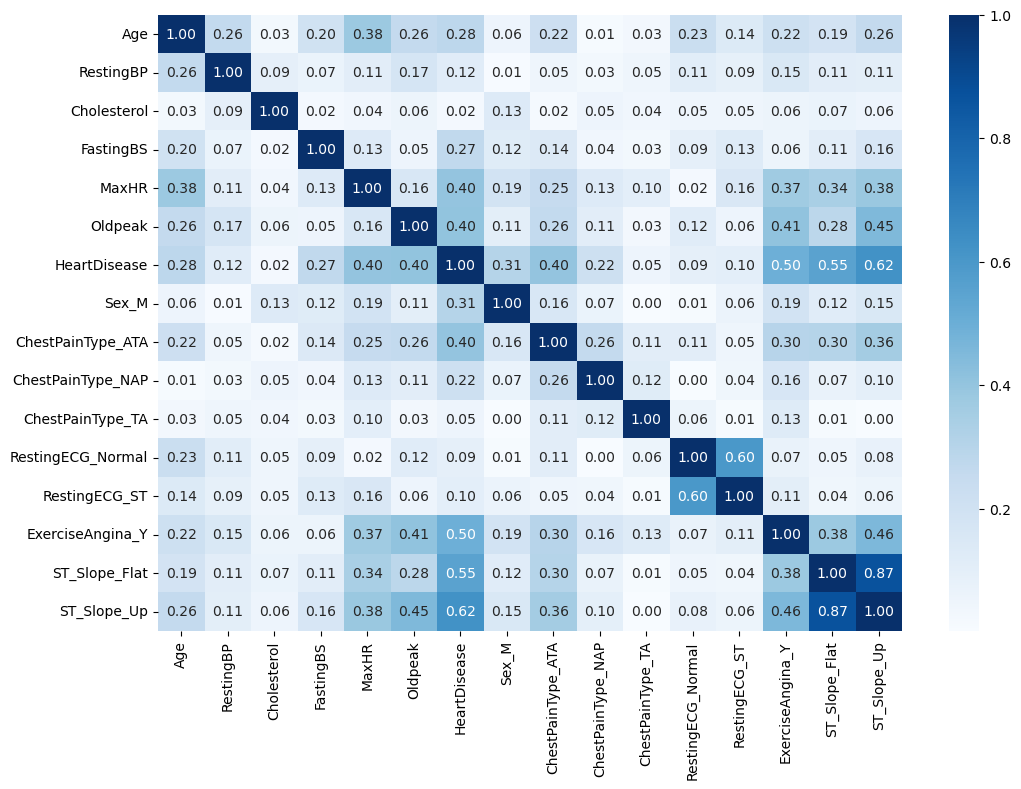

In [20]:
corr = abs(df_feat.corr())
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr,annot=True, fmt=".2f", cmap="Blues")

Using the heatap on the pearson correlations, the features that are more correlated to HeartDisease, although moderately negative, are 
* ST_SlopeUp and 
* ChestPainTypeATA,

and moderatly positive with 
* ST_Slope_Flat and 
* ExerciseAngina_Y. 

Other variables less related are 
* MaxHR and 
* OldPeak. 
* Sex_M

can also be a relevant variable. In the next Heatmap we can observe the variables with correlations over 0.3 with HeartDisease:

<AxesSubplot:>

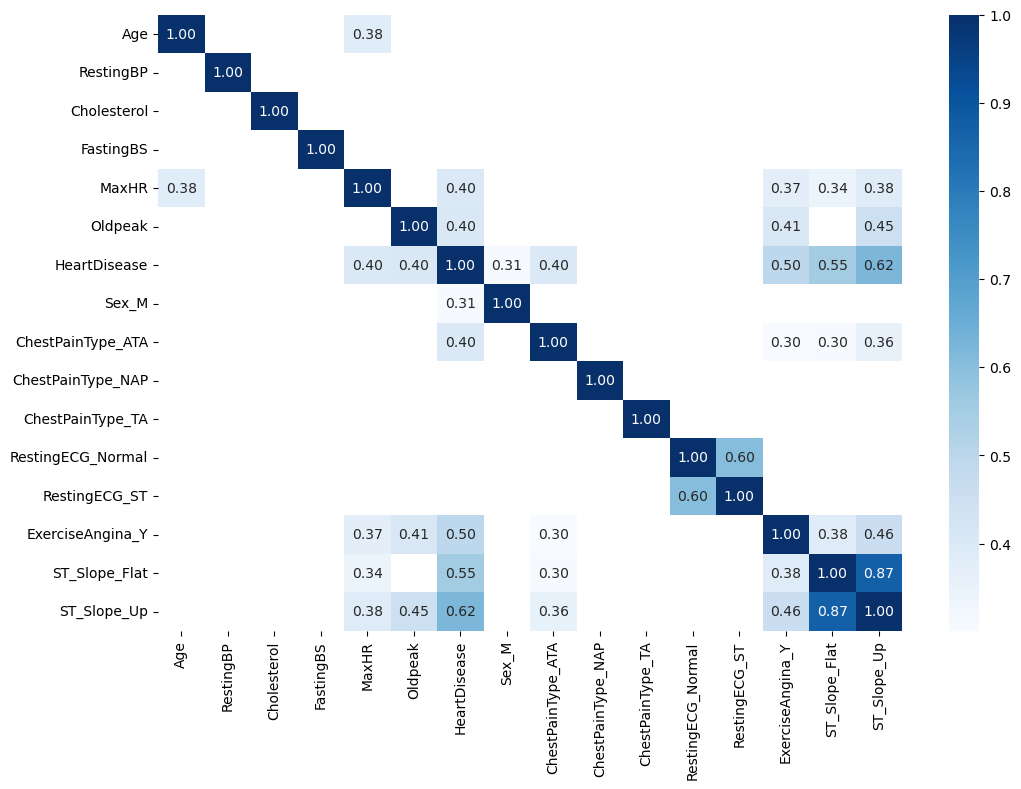

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr[corr > 0.3],annot=True, fmt=".2f", cmap="Blues")

#### [Optional] Select features using the square of the Pearson correlation coefficient instead. Do you think that would be a better approach?

This might not be a good approach since it implies a linear relationship between the variables.

# Building a Classifier I

Split the dataset into training and validation sets. 

In [22]:
X = df_feat.drop(["HeartDisease"], axis=1)
y = df_feat["HeartDisease"]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state = 417)



Create a list that contains your selected features as strings

In [23]:
#features = ['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak', 'ChestPainType_ATA', 'MaxHR', 'Sex_M']
features = corr["HeartDisease"].sort_values(ascending=False)[1:8].index
print(features)
features = ['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak',
       'ChestPainType_ATA', 'MaxHR', 'Sex_M']

Index(['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak',
       'ChestPainType_ATA', 'MaxHR', 'Sex_M'],
      dtype='object')


Create a KNN Classifier, fitting the model to the training data one feature at a time.

In [24]:
# Create a list that stores integers from 1 to 5.
neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create an empty dictionary named "accuracies."
accuracies = {}
# Iterate over the list. For every iteration:
for f in features:
    for n in neighbors:
        # Create an instance of KNeighborsClassifier. Pass the integer from the list as an argument for the number of neighbors.
        knn = KNeighborsClassifier(n_neighbors=n)
        # Fit the model on the training data.
        knn.fit(X_train[[f]], y_train)
        # Evaluate the model on the scaled validation set.
        val_accuracy = knn.score(X_val[[f]], y_val)
        # Add the iteration variable's value as a key to accuracies with the accuracy as a value.
        accuracies[f, n] = val_accuracy

# Print the dictionary.
accuracies


{('ST_Slope_Up', 1): 0.8405797101449275,
 ('ST_Slope_Up', 2): 0.8405797101449275,
 ('ST_Slope_Up', 3): 0.8405797101449275,
 ('ST_Slope_Up', 4): 0.8405797101449275,
 ('ST_Slope_Up', 5): 0.8405797101449275,
 ('ST_Slope_Up', 6): 0.8405797101449275,
 ('ST_Slope_Up', 7): 0.8405797101449275,
 ('ST_Slope_Up', 8): 0.8405797101449275,
 ('ST_Slope_Up', 9): 0.8405797101449275,
 ('ST_Slope_Up', 10): 0.8405797101449275,
 ('ST_Slope_Flat', 1): 0.8188405797101449,
 ('ST_Slope_Flat', 2): 0.8188405797101449,
 ('ST_Slope_Flat', 3): 0.8188405797101449,
 ('ST_Slope_Flat', 4): 0.8188405797101449,
 ('ST_Slope_Flat', 5): 0.8188405797101449,
 ('ST_Slope_Flat', 6): 0.8188405797101449,
 ('ST_Slope_Flat', 7): 0.8188405797101449,
 ('ST_Slope_Flat', 8): 0.8188405797101449,
 ('ST_Slope_Flat', 9): 0.8188405797101449,
 ('ST_Slope_Flat', 10): 0.8188405797101449,
 ('ExerciseAngina_Y', 1): 0.5507246376811594,
 ('ExerciseAngina_Y', 2): 0.7318840579710145,
 ('ExerciseAngina_Y', 3): 0.7318840579710145,
 ('ExerciseAngina_Y'

By checking the accuracies with the number of neighbors for each feature, we can see that the best performing feature is the ST_Slop_Up with 84%.
The next best performing feature was is ST_Slope_Flat with 81.9%. OldPeak performed well with 77.5% with 9 neighbors, which is better than ExerciseAngina_Y that had a smaller performance of 73% with a higher correlation. ChestPain_ATA had a lower accuracy with lower neighbors than the less correlated variable MaxHR, which had a maximum 67%accuracy with 8 neighbors, not much lower than the former, 70%. The lower accuracy feature was Sex_M. Still it achived 62% with 5 neighbors.

The fact that ExerciseAngina_Y underperformed OldPeak although the correlation is higher with the target variable, may be related with other non linear relationships between these variables and HeartDisease.

# Building a Classifier II

 Let's train a model on all of these features together.

Before we do, it's important to note that our features are not yet normalized. Not all of the values are within the same range. We will first scale our data to the range (0, 1) before training our model. Note: We will only scale our selected features.

In [25]:
# Using MinMaxScaler, scale the selected features to the range (0, 1)
scaler = MinMaxScaler()

# Fit and transform the features in the training set using the scaler and save the output.
X_train_scaled = scaler.fit_transform(X_train[features])

# Transform the features in the validation set.
X_val_scaled = scaler.transform(X_val[features])



Create a KNN Classifier and fitt the model

In [26]:
neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create an empty dictionary named "accuracies."
accuracies = {}
# Iterate over the list. For every iteration:

for n in neighbors:
    # Create an instance of KNeighborsClassifier. Pass the integer from the list as an argument for the number of neighbors.
    knn = KNeighborsClassifier(n_neighbors=n)
    # Fit the model on the training data.
    knn.fit(X_train_scaled, y_train)
    # Evaluate the model on the scaled validation set.
    val_accuracy = knn.score(X_val_scaled, y_val)
    # Add the iteration variable's value as a key to accuracies with the accuracy as a value.
    accuracies[n] = val_accuracy

# Print the dictionary.
accuracies

{1: 0.8043478260869565,
 2: 0.8115942028985508,
 3: 0.8333333333333334,
 4: 0.8405797101449275,
 5: 0.8333333333333334,
 6: 0.8478260869565217,
 7: 0.8478260869565217,
 8: 0.8478260869565217,
 9: 0.8260869565217391,
 10: 0.8478260869565217}

The higher accuracy obtained was 84.8% using 6 neighbors.
by using all the features the model improved only 0.4% in relation to the best performing model in the previous analysis, with only the ST_Slop_Up variable.
Increasing the test_size reduces the accuracy in almost 3%.

# Hyperparameter Tuning

Our previous model using all of our selected and normalized features got an accuracy of ~88%! That's not a strong improvement on the model trained on just the ST_Slope_Flat feature, but it's a good start.

Now that we have a reasonably well-performing model, we can experiment with the parameters and hyperparameters. We'll use GridSearchCV to search over those values.

GridSearchCV, as we know, allows us to search over all the parameters for our classifier in scikit-learn. For example, for the KNeighborsClassifier we can choose to experiment with the following:

    n_neighbors,
    weights,
    metric and more.

Additionally, since GridSearchCV creates a validation set as part of its process, we'll have to update our workflow a bit.

Split the dataset into training and test sets. 

In [27]:
X = df_feat.drop(["HeartDisease"], axis=1)
y = df_feat["HeartDisease"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 417)



Scale the training set.

In [28]:
# Using MinMaxScaler, scale the selected features to the range (0, 1)
scaler = MinMaxScaler()

# Fit and transform the features in the training set using the scaler and save the output.
X_train_scaled = scaler.fit_transform(X_train[features])


Instantiate a k-NN model.

In [29]:
knn = KNeighborsClassifier()

Create a dictionary in which:
* The keys are the hyperparameters you want to optimize for.
* The corresponding values are the range of hyperparameter values you want to search.


In [30]:
parameters = {'n_neighbors': range(1, 20),
             'weights': ['uniform', 'distance'],
              "metric": ["minkowski", "manhattan"], 
             'p': [1, 2, 5]}

Create an instance of GridSearchCV. Pass the following to the instance:
* Set estimator to the model instance.
* Set param_grid to the dictionary created above.
* Set scoring to the string accuracy.


In [31]:
knn_grid = GridSearchCV(estimator=knn, 
                        param_grid=parameters, 
                        scoring='accuracy')

Fit the above instance on the scaled features and corresponding labels

In [32]:
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20), 'p': [1, 2, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Print out the best score and the best parameters obtained from the grid search.

* Refer to the attributes listed in the documentation in order to print these values.


In [33]:
best_score = knn_grid.best_score_
best_params =knn_grid.best_params_

print(f"Best score: {best_score*100:.2f}%")
print(f"Best parameters: {best_params}")


Best score: 84.59%
Best parameters: {'metric': 'minkowski', 'n_neighbors': 19, 'p': 5, 'weights': 'uniform'}


The model's accuracy was 85.59%, not musch better than before, with minkowski, 19 neighhbors and unifor weights. Since GridSearchCV employs a cross-validation approach, it is reasonable to assume that this is a better estimate of how the model performs compared to our prior attempt.

# Model Evaluation on Test Set

We'll now evaluate this model on our test set. Recall that we need to normalize our test set and use the same scaler we created earlier. However, this time we'll only transform the test set and not fit the scaler on it.

scikit-learn makes it easy for us to use the model obtained from GridSearchCV using the attribute best_estimator_. We can use it directly to try and predict how our model would do on our test set.

Scale the same features from the test set.

In [35]:
X_test_scaled = scaler.transform(X_test[features])

Predict the model's output on the scaled features from the test set using the best estimate.

In [44]:
best_estim=knn_grid.best_estimator_
predictions = knn_grid.best_estimator_.predict(X_test_scaled)

Calculate and print the accuracy of the model's prediction.

In [47]:
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy score on test set: {accuracy*100:.2f}%")


Model accuracy score on test set: 85.51%


The model accuracy on the test set was nearly the same as the training set. Which coould be expected.
On the solution notebook the accuracy was higher than the training set:



Our model got an accuracy of ~87%. That's really good! This means that our model is likely to correctly predict whether a patient is at risk for a heart disease ~87% of the time.

However, the accuracy being higher than the one before raises some flags.

One explanation that could explain is to look at how the data is distributed.


In [48]:
print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts())


Distribution of patients by their sex in the entire dataset
1    724
0    193
Name: Sex_M, dtype: int64

Distribution of patients by their sex in the training dataset
1    615
0    164
Name: Sex_M, dtype: int64

Distribution of patients by their sex in the test dataset
1    109
0     29
Name: Sex_M, dtype: int64




We used Sex as one of our features for training the model.

* X had 724 males and 193 females.
* X_train had 615 males and 164 females.
* X_test had 109 males and 29 females.

We can see that the above datasets have a significantly higher number of male patients than female ones. We briefly mentioned previously that this could present a bias because of this imbalance in our dataset and we can see it potentially impacts our model. If the test dataset doesn't have that many female patients and the model was trained on a dataset with more male patients, then it is understandable it has better accuracy on the test set. Of course, there could be other factors contributing to this discrepancy.


# Summary and Next Steps

Our final model was trained using the following features:

* Oldpeak
* Sex_M
* ExerciseAngina_Y
* ST_Slope_Flat
* ST_Slope_Up
* MaxHR

and had a test set accuracy of 86.96%. However, given the limitations of our data this accuracy might not be indicative of a well performing model.

There are quite a few things we could try next to get better results:

* Try out different features.
* Expand the grid search parameters to identify more optimal hyperparameters.
* Explore other algorithms that might perform better than k-NN.
* Try and collect more data.
